<a href="https://colab.research.google.com/github/zum-m/01_jouhougakugairon/blob/web_contents/Copy_of_%E7%AC%AC9%E5%9B%9E_CSS%E3%81%AB%E3%82%88%E3%82%8B%E8%A1%A8%E7%A4%BA%E3%81%AE%E6%BC%94%E5%87%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#本日の概要
Webが利用される場面はPCのブラウザだけでなく、スマートフォン、タブレット、スマートTVなどさまざまです。CSSの目的の１つは異なる性質をもつデバイスであっても共通の記述が利用できるようにする目的があります（レスポンシブデザインと呼ばれている）。実用例を紹介することはできませんが、CSSに用意されている機能の紹介をしておきます。

また後半ではCSS3で加わった表現機能についても、一部の例ですが紹介をします。

#3-1 @-規則
##3-1-1 CSSファイルの＠で始まる記述
CSSの特徴として、使用状況や表示デバイスに対応して、CSS指定を切り換えることができる点です。完全に実装されていない部分もあるので、代表的な例をみていきたいと思います。CSSファイルの例を見ていると＠から始まるステートメントが目に付きます。＠-規則を用いて、適用する条件を指定することができるようになっています。
@-規則はCSSの振る舞いを規定する命令です。すでに出てきてる例では「@charset」です。これはCSS記述の文字コードの宣言です
```
@charset "UTF-8";
```
@で始まり、その後に機能を表す識別名、その後に指示内容（{ } によるブロックなど）が書かれ、最後は";"で終わります。
```
/* 一般的な構造 */
@IDENTIFIER (RULE);
```

3-1-2 ##代表的な規則
###(1) ＠charset：文字セットの指定
前に書いたとおり。
###(2) @import：外部スタイルシートの読み込み
```
@import url;
@import url list-of-media-queries;
```
###(3) @media：メディアタイプによる条件指定
```
@media ( condition ) [and ( condition )]... [, ...]
@media media_type [and ( condition )]... [, ...]
```
@mediaでメディアタイプに応じたCSS記述を指定することができます。printを指定すれば、プリント出力のときのそのCSS記述が用いられます。メディアタイプの指定はHTMLでのlink要素でも指定ができます。

####link要素でのメディアタイプの指定の例
```
<link rel="stylesheet" media="handheld" href="mobile.css">
<link rel="stylesheet" media="print" href="print.css">
```
####指定できるメディアタイプ
* all … すべてのデバイス
* print … 印刷物
* screen … コンピューターのスクリーン ≫レスポンシブWebデザイン
* speech … スピーチ シンセサイザー (音声合成のシステム)

####メディアタイプの例
```
@media screen {
  em { color: red; }
}
@media print {
  em { font-weight: bold; }
}
```
####メディアクエリの例
```
/* 幅が 767px 以下であれば */
@media (max-width:767px) { ... }

/* 幅が 768px 以上であれば */
@media (min-width:768px) { ... }

/* 幅が 768px以上 1200px以下であれば */
@media (min-width:768px) and (max-width:1200px) { ... }

/* カラーディスプレイまたはモノクロ印刷であれば */
@media screen and (color), print and (monochrome) { ... }
@support：特定の機能のサポートによる条件指定
@supports [not] ( condition ) { ... }
@supportの例（flexboxがサポートされている場合に適用）
@supports ( display: flexbox ) {
  body, #navigation, #content { display: flexbox; }
  #navigation { background: blue; color: white; }
  #article { background: white; color: black; }
}
@supports not ( display: flexbox ) {
  body { width: 100%; height: 100%; background: white; color: black; }
  #navigation { width: 25%; }
  #article { width: 75%; }
}
```
###(4) @page：印刷指定
```
@page {...}
@page :selector {...}
```
印刷時のページに関わるスタイルを指定します。ページスタイルでは、margin, margin-top, margin-bottom, margin-left, margin-right, size, marks を指定できます。

####印刷指定の例
```
@page { margin-top: 2cm; margin-bottom: 2cm; }

@page :first { margin-right: 4cm; }
@page :right { margin-right: 4cm; }
@page :left { margin-left: 4cm; }
@page :blank { margin-left: 4cm; }
```
###(5) @viewport：モバイルデバイスのような画面のビューポート指定
@viewportはスマートフォンのような小型デバイスの画面表示指定のためにあります。しかし、ほとんどのスマートフォンのブラウザではサポートされていないようです。現在はHTMLの「meta」タグで指定をすることができます。

最近のスマートフォンの画面は高解像度であり、本来の解像度でレンダリングを行うと表示が小さくてほとんど読むことができない大きさで表示されてしまいます。そこで、仮想的な解像度のビューポートを設定して異なる解像度であってもほぼ同じように閲覧できるよう viewport指定をします。width=device-widthと指定することで、スマートフォンの場合は標準的な解像度に設定されます。しかし、iPhoneとAndroidでは異なるようです。正確に横の解像度を指定したい場合は、width=380pxといった指定をします。

####metaタグでの指定例
```
<meta name="viewport" content="width=360,initial-scale=1">
<meta name="viewport" content="width=device-width,
initial-scale=1">
```
####viewportの属性
```
min-width
```
文書が最初に表示されたときの、ビューポートの幅を決めるのに使われます。
```
max-width
```
文書が最初に表示されたときの、ビューポートの幅を決めるのに使われます。
```
width
```
min-width と max-width の両方を設定するための一括指定です。
```
min-height
```
文書が最初に表示されたときの、ビューポートの高さを決めるのに使われます。
```
max-height
```
文書が最初に表示されたときの、ビューポートの高さを決めるのに使われます。
```
height
```
min-height と max-height の両方を設定するための一括指定です。
```
zoom
```
ズームの初期値を設定します。
```
min-zoom
```
ズームの最小値を設定します。
```
max-zoom
```
ズームの最大値を設定します。
```
user-zoom
```
ユーザーがズーム倍率を変更できるか否かを制御します。
```
orientation
```
文書の向きを制御します。
```
viewport-fit
```
長方形ではないディスプレイでの文書の表示を制御します。

###(6) @keyframes：キーフレームの指定
アニメーション開始から終了するまでどのようなアニメーションをするのか指定できるCSSの文法です。

※3-3で説明します。

##演習課題3-1
@media指定を使って、画面の横幅（1000pxを基準）により1段組（段組みなし）と2段組みを選択するようなHTML, CSSのページ例です。Colab内では実験できないと思っていましたが、機能しているようです。

横幅が1200px以上ならば3段組み、800px以上ならば2段組み、それ以下は1段となるようにするにはどう記述するか試してみなさい。

※ この機能は画面の幅により段組設定を変更する場合に役立ちます。Javascriptを利用して実現する手段はあります。

 ファイル名は第9回Webコンテンツ制作演習_課題1.ipynb とすること


In [ ]:
%%HTML
<style>
@charset "UTF-8";
@media(min-width: 1000px) {  /* 1000px以上（最小1000px）の横幅について以下を適用 */
  body {                    /* body部全体に適用 */
    column-count: 2;        /* 2段組みに設定（ただし、CSS3の機能なので、旧いブラウザでは未対応の場合がる */
  }
}
</style>

<p>大型で強い台風２５号は４日、沖縄地方に接近した。気象庁によると、今後は東シナ海を北上して６日、九州北部に最接近し、日本海を通って７日にも東北や北海道に近づく見通し。</p>
<p>台風２５号は５日午前０時現在、沖縄・久米島の西南西約５０キロを時速約２５キロで北北西へ進んでいる。中心気圧は９６５ヘクトパスカル、最大風速は３５メートル、最大瞬間風速は５０メートル。九州北部では５日以降、大雨による土砂災害や暴風などに警戒が必要だという。</p>
<p>台風２４号は、九州の南から四国沖の海面温度が高い水域を通ったため、勢力が衰えないまま列島を縦断。記録的な暴風をもたらした。今回の２５号は、２４号の進路に比べて海面温度が低い東シナ海から日本海を通る見通しで、勢力は弱まりそうだという。ただ、北日本に接近する７日時点では、暴風域を伴っている予想となっている。<p>



---



#3-2 CSSによる演出
いままで全体に影響するようなものを対象にしてきましたが、すこし見た目を演出するような手法について紹介をします。気楽に取り組んでみてください。

いままでやったセレクタの小技も入れてみました。CSSは記述していますが、対象のHTMLについては記述していないので、HTMLを記述して動作を確認してみてください。



##3-2-1 1文字目を大きくする。
::first-letterは最初の文字を示すセレクタです。以前はコロン":"は１つでしたが、２つになりました。例は適当な数値を設定しておりますが、きれいにみえるようにするには微調整が必要です。実際に表示をさせてみてください。

###CSS記述
```
p::first-letter {
  float: left;
  padding: 0.1em 0.1em 0 0;
  line-height: 0.9em;
  font-size: 4em;
  font-weight: bold;
}
```
###対象部分のHTML記述
```
<p>機械学習（きかいがくしゅう、英: machine learning）とは、人工知能における研究課題の一つで、人間が自然に行っている学習能力と同様の機能をコンピュータで実現しようとする技術・手法のことである。</p>
```

In [ ]:
%%HTML
<style>
body {
    width: 70%;
}
p::first-letter {
  float: left;
  padding: 0.1em 0.1em 0 0;
  line-height: 0.9em;
  font-size: 4em;
  font-weight: bold;
}
</style>
<p>機械学習（きかいがくしゅう、英: machine learning）とは、人工知能における研究課題の一つで、人間が自然に行っている学習能力と同様の機能をコンピュータで実現しようとする技術・手法のことである。</p>

##3-2-2 CSSで単位をに入れる。
::afterセレクタで要素の後ろを指定できる。contentプロパティを使って特定の文字を挿入することができる。
###CSS記述
```
span.celsius::after {
  content: "\2103";   /* \2103は「℃」の文字 */
  font-weight: bold;
  color: darkred;
}
span.celsius {
  font-weight: bold;
  color: darkred;
}
```
###HTML記述
```
<p>なんと今日の最高気温は<span class="celcius">38</span>でした。</p>
```

In [ ]:
%%HTML
<style>
span.celcius {
  font-weight: bold;
  color: darkred;
}
span.celcius::after {
  content: "\2103";
  font-weight: bold;
  color: darkred;
}
</style>
<p>なんと今日の最高気温は<span class="celcius">38</span>でした。</p>

##3-2-3 色をグラデーション、半透明で指定する
グラデーションは色を指定するところで簡単に指定できます。ほか半透明の指定、ボーダーのラウンドなどの指定をしてみました。
グラデーションは放射状にかける方法もあります（radial-gradient）
###CSS記述
```
html {
  min-height: 100%;  /* グラデーションを全体にかけるため */
}
body {
  background: linear-gradient(45deg, Aqua, SpringGreen);  /* グラデーションの指定 */
}
.content {
  margin: 5mm auto 0 auto;  /* 上 右 下 左 の順, 左右はautoで均等に */
  padding: 5mm;
  border-radius: 10px;
  background: rgba(255, 255, 255, 0.6);  /* 白の半透明度 0.6 */
}
```
###対象部分のHTML記述
```
<div class="content">
    <h2>グラデーションで背景を指定</h2>
    <p>色はグラデーションを用いたり、半透明色を指定したりすることができます。背景をグラデーションにして、その上のボックスは半透明に指定しています。</p>
</div>
```

In [ ]:
%%HTML
<style>
html {
  min-height: 100%;
}
body {
  background: linear-gradient(45deg, Aqua, SpringGreen);
  height: 200px;
}
.content {
  margin: 5mm 10mm auto 10mm;
  padding: 5mm;
  border-radius: 10px;
  background: rgba(255, 255, 255, 0.6);
}
</style>
<div class="content">
<h2>グラデーションで背景を指定</h2>
<p>色はグラデーションを用いたり、半透明色を指定したりすることができます。背景をグラデーションにして、その上のボックスは半透明に指定しています。</p>
</div>

##3-2-4 奇数と偶数で分ける
nth-child(n)はnで順番を指定できますが、odd, even あるいは 2n, 2n+1といった指定もできます。それを利用してチェッカー模様をtableで作成してみます。
まずtableはシンプルに中身は何もない8×8マスを作ります。
```
<table class="checker">
...
</table>
```
CSSはnth-childを使用して以下のようになります。
```
table.checker {
  border-collapse: collapse;
}
.checker td {
  padding: 0;
  border: solid 1px black;
  width: 1cm;
  height: 1cm;
}
.checker tr:nth-child(odd)>td:nth-child(odd) {
  background: black;
}
.checker tr:nth-child(even)>td:nth-child(even) {
  background: black;
}
```

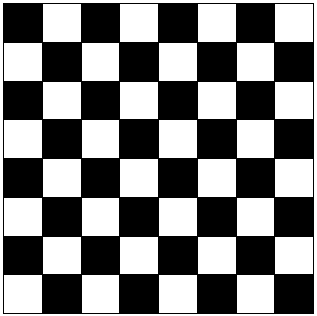

##演習課題 3-2

上の例になるようHTMLとCSSを記述してみてください（上のCSSの例はもっとよい記述に変更してくれて結構です）。また、白黒を反転させたパターンのCSSも記述してください。

 ファイル名は第8回Webコンテンツ制作演習_課題2.ipynb とすること



---



#3-3 アニメーション機能：CSS TransitionとCSS Animation
CSS3になって、CSS Transition、CSS Animationといった機能が加わりました。CSS Transitionはプロパティに変更があった時に、一定時間でプロパティを変化させる機能です。操作時の単純な動きのアニメーションを実装する時に利用できます。 CSS Animationはキーフレームアニメーションを実現する既往です。キーフレームアニメーションとはアニメーションの開始(0%)から終了(100%)までの任意の経過地点にプロパティを指定できるアニメーションのことです。 細かい動きのアニメーションを実装する時に利用できます。

今回は、簡単な例の紹介のみとします。時間があるときに、いろいろ実験をしてみてください。

このようなアニメーションはCSSを利用する以外に、JavascriptプログラムやSVGを利用する方法があります。

##3-3-1 CSS Transtion
以下の例はマウスがホバーするとボックスの大きさが大きくなり、色が赤から青へと変化します。途中の動きはありません。一瞬です。
###HTML
```
<div class="box"></div>
```
###CSS
```
.box {
  width: 100px;
  height: 100px;
  background: red;
}

.box:hover {
  background: blue;
  width: 300px;
}
```

In [ ]:
%%HTML
<style>
.box {
  width: 100px;
  height: 100px;
  background: red;
}

.box:hover {
  background: blue;
  width: 300px;
}
</style>

<div class="box"></div>

これを一瞬ではなく、一定時間で変化させるためにCSS Transition機能を使います。今回は0.3秒をかけて変換させるために .box に
transition: all 300ms 0s ease;の記述を追加します。

###Transitionを入れたCSS
```
.box {
  width: 100px;
  height: 100px;
  background: #000;
  transition: all 300ms 0s ease;  /* この部分を追加 */
}

.box:hover {
  background: #ccc;
  width: 300px;
}
```

In [ ]:
%%HTML
<style>
.box {
  width: 100px;
  height: 100px;
  background: red;
  transition: all 500ms 0s ease;  /* この部分を追加 */
}

.box:hover {
  background: blue;
  width: 300px;
}
</style>

<div class="box"></div>

transitionは複数のプロパティの値をまとめて指定するプロパティのため transition: all 300ms 0s ease;を以下のように記述できる。
```
.box {
  width: 100px;
  height: 100px;
  background: #000;
  transition-property: all;
  transition-duration: 300ms;
  transition-delay: 0s;
  transition-timing-function: ease;
}
```
**tansition-property**  
どのプロパティにアニメーションを適用するか指定するプロパティ。

**transition-duration**  
アニメーション開始から終了までの所要時間を指定するプロパティ。

**transition-delay**  
アニメーションが開始するまでの遅延時間を指定するプロパティ。

**transition-timing-function**  
アニメーションのイージングを指定するプロパティ。 プロパティの値は定義済みの値(*ease*、*linear*、*ease-in*等)か*cubic-bezier()*で指定する。

[MSNでのtransition機能の紹介](https://developer.mozilla.org/ja/docs/Web/CSS/CSS_Transitions/Using_CSS_transitions) https://developer.mozilla.org/ja/docs/Web/CSS/CSS_Transitions/Using_CSS_transitions

##3-3-2 CSS Animation
要素にrotationという名前のキーフレームアニメーションを適用してアニメーションさせてみる。

アニメーションの開始(0%)、中間(50%)、終了(100%)の地点にプロパティを指定したrotationという名前のキーフレームアニメーションを.boxに適用したい。

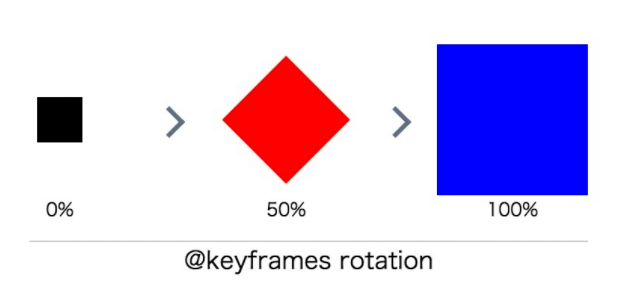

前述のとおり、適用するキーフレームアニメーションは定義する必要があるため、@keyframesでrotationを定義する。
##HTML
```
<div class="box"></div>
```
###CSS
```
.box {
  width: 100px;
  height: 100px;
  background: black;
}

@keyframes rotation {
  0% {
    transform: scale(.3);
  }

  50% {
    transform: scale(.6) rotate(-45deg);
    background: red;
  }

  100% {
    transform: scale(1) rotate(180deg);
    background: blue;
  }
}
```
キーフレームアニメーションを定義しただけなので、アニメーションはしていない状態。

In [ ]:
%%HTML
<style>
.box {
  width: 100px;
  height: 100px;
  background: #000;
}

@keyframes rotation {
  0% {
    transform: scale(.3);
  }

  50% {
    transform: scale(.6) rotate(-45deg);
    background: red;
  }

  100% {
    transform: scale(1) rotate(180deg);
    background: blue;
  }
}
</style>

<div class="box"></div>

定義したrotationを.boxに適用するために、.boxにanimation: rotation 2s ease 0s infinite alternate none running;の記述を追加する。

このようにキーフレームアニメーションを@keyframesで定義をし、animationで指定することでアニメーションを実装できる。

In [ ]:
%%HTML
<style>
.box {
  width: 100px;
  height: 100px;
  background: black;
  animation: rotation 2s ease 0s infinite alternate none running;
}

@keyframes rotation {
  0% {
    transform: scale(.3);
  }

  50% {
    transform: scale(.6) rotate(-45deg);
    background: red;
  }

  100% {
    transform: scale(1) rotate(180deg);
    background: blue;
  }
}
</style>

<div class="box"></div>

animationは複数のプロパティの値をまとめて指定するプロパティのため animation: rotation 2s ease 0s infinite alternate none running;を以下のようにも記述できる。
```
.box {
  width: 100px;
  height: 100px;
  background: #000;
  animation-name: rotation;
  animation-duration: 2s;
  animation-timing-function: ease;
  animation-delay: 0s;
  animation-iteration-count: infinite;
  animation-direction: alternate;
  animation-fill-mode: none;
  animation-play-state: running;
}
```
**animation-name**  
要素に適用するキーフレームアニメーションを指定するプロパティ。キーフレームアニメーションは@keyframesで定義する必要がある。

**animation-duration**  
アニメーション開始から終了までの所要時間を指定するプロパティ。 プロパティの値は定義済みの値(ease、linear、ease-in等)かcubic-bezier()で指定する。

**animation-timing-function**  
アニメーションのイージングを指定するプロパティ。

**animation-delay**  
アニメーションが開始するまでの遅延時間を指定するプロパティ。

**animation-iteration-count**  
アニメーションのループ回数を指定するプロパティ。infiniteを指定すると無限ループする。

**animation-direction**  
アニメーションの再生方向を指定するプロパティ。値（normal, reverse, alternate, alternate-reverse）。

**animation-fill-mode**
キーフレームアニメーションで指定したプロパティをアニメーション開始前、終了後に適用するかどうかを指定するプロパティ。値（none, forwards, backwards, both）。

**animation-play-state**  
アニメーションを再生中か一時停止にするプロパティ（running, paused）。 ※JavaScriptと組み合わせて利用する。

##演習課題 3-3
紹介した例題とは別の簡単なアニメーションの例を作成（実験）した結果を報告してください。

実用的でなくてもかまいません。形を変更したり、パラメータを変更した実験報告程度で結構です。

 ファイル名は第9回Webコンテンツ制作演習_課題3.ipynb とすること

 ※ 必ず，どういう実験を行い，どのような結果になったのかテキストで記載すること．記載のない場合は減点対象とする．

